In [427]:
from IPython import display
from PIL import Image
from itertools import product
import numpy as np
from IPython.display import display




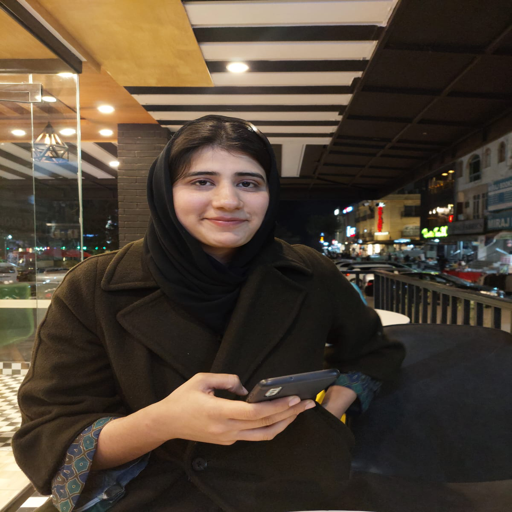

In [428]:
# image = Image.open('/content/1.jpeg') # /home/labuser/Downloads
image = Image.open('/Users/USER/Downloads/1.jpeg') 
new_image = image.resize((512, 512))
new_image

In [441]:
# Load the image
image = new_image
# Determine the size of each piece
piece_size =  170 # 256  #128 # 256

# Calculate the number of pieces that will fit in the image
num_pieces_x = image.width // piece_size
num_pieces_y = image.height // piece_size

# Create a list to store the extracted pieces
pieces = []

# Loop over the image and extract each piece
for i in range(num_pieces_x):
    for j in range(num_pieces_y):
        # Calculate the coordinates of the piece
        left = i * piece_size
        top = j * piece_size
        right = left + piece_size
        bottom = top + piece_size
        
        # Extract the piece from the image and store it
        piece = image.crop((left, top, right, bottom))
        pieces.append(piece)



In [442]:
len(pieces)

9

In [447]:
TotalRowsCol=3 # total length of rows/col
lastRowCol=2 # last index of row /col

In [448]:
# originalKeyValues=([[[1,2,3],[4,5,6],7,8,0]])
# shuffledKeys=([[[1,0,3],[6,5,4],7,8,1]])


In [449]:
# Create an empty dictionary
imageValuesInDic = {} # stores each small image and index against that image 
for i in range(0, len(pieces)):
    imageValuesInDic[i] = pieces[i]
# print(imageValuesInDic)




In [450]:
import random 
# Extract the dictionary items and  then shuffle the list
originalKeyValues=np.array(list(imageValuesInDic.keys())).reshape((TotalRowsCol, TotalRowsCol))
imageUnShuffledValues=np.array(list(imageValuesInDic.values())).reshape((TotalRowsCol, TotalRowsCol))
# print(imageUnShuffledValues)
# print(originalKeyValues)
items = list(imageValuesInDic.items())
random.shuffle(items)
# Create a new dictionary using the shuffled items
shuffled_dict = dict(items)

values = list(shuffled_dict.values())
# Reshape the list into an  array
imageShuffledValues = np.array(values).reshape((TotalRowsCol, TotalRowsCol))
shuffledKeys=np.array(list(shuffled_dict.keys())).reshape((TotalRowsCol, TotalRowsCol))



C:\Users\USER\AppData\Local\Temp/ipykernel_20436/2298487970.py:4: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  imageUnShuffledValues=np.array(list(imageValuesInDic.values())).reshape((TotalRowsCol, TotalRowsCol))
C:\Users\USER\AppData\Local\Temp/ipykernel_20436/2298487970.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  imageUnShuffledValues=np.array(list(imageVal

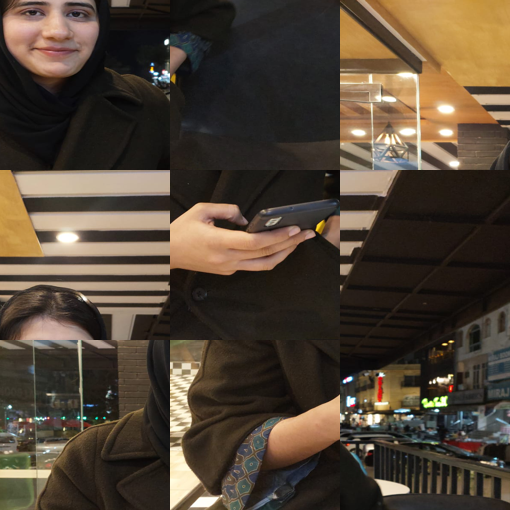

In [467]:
t=0
def showImage(h):
    global t
    t=t+1
    gatherfromMatric = h #imageUnShuffledValues
    #number of rows and columns of image 
    num_rows, num_cols = gatherfromMatric.shape
    # Concatenate the image  horizontally and vertically
    rows = [np.concatenate(gatherfromMatric[i, :], axis=0) for i in range(num_rows)]
    image_array = np.concatenate(rows, axis=1)

    # Create a new PIL Image object from the concatenated array
    pil_image = Image.fromarray(image_array)
    # Save or display the image as desired
    display(pil_image)
    
showImage(imageShuffledValues) 

In [468]:
# h

In [469]:
# Compare each element in the arrays
h=0
def calculateHeuristics(matrix):
    global h
    h=0
    for i in range(TotalRowsCol):
        for j in range(TotalRowsCol):
            if matrix[i][j] != originalKeyValues[i][j]:
                h=h+1
#     print(h) 
    return h
calculateHeuristics(shuffledKeys)

9

In [470]:
import copy
shuffledKeys
copied_matrix = copy.deepcopy(shuffledKeys)


In [471]:
def find_zero(start):
#     print("h");
    for row in range(TotalRowsCol):
        for col in range(TotalRowsCol):
            if start[row][col] == 0:
#                 print(row,col)
                return row, col
x,y=find_zero(shuffledKeys)
print(x,y) 

2 0


In [472]:
# data

In [473]:
def extractFromDicAndSort():
    global h
    while( h>=1):
        smallest_count = min(data.values(), key=lambda x: x['heuristics'])['heuristics']
        # iterate over the records in the dictionary and check if their heuristics value matches the smallest
        for key, value in data.items():
            if value['heuristics'] == smallest_count:
            # if the heuristics value matches the smallest, add the key to the   smallest keys
                smallest_keys=key
                break
        # iterate over the records with the smallest heuristics value and extract the relevant values
        matrix_data = data[smallest_keys]
        matrix = matrix_data['matrix']
        hr = matrix_data['heuristics']
#         print(hr)
#         showImage(imageValue)
        move = matrix_data['dontmove']
        imageValue = matrix_data['imagematrix']
        showImage(imageValue)
        h=hr
        del data[key]
        global count
        if(hr==1):
            return 1
        else:
            x,y=find_zero(matrix) # this will return index
    #         print(unsortedValues)
            unsortedValues=copy.deepcopy(matrix)
    #         print(x,y)
            tempMatrix=copy.deepcopy(unsortedValues)
            simageVal=copy.deepcopy(imageValue)
        #     // we know that our matrix is 8*8 
        # at this stage we will check that what are possible moves with respect to position of zero
            if(x!=0 and x!=lastRowCol): # columns
    #             print("moveup and down both")
    #             print("move up")
                if (move!='up'):
                    tempMatrix=copy.deepcopy(unsortedValues)
                    temp=tempMatrix[x-1][y]
                    tempMatrix[x-1][y]=0
                    tempMatrix[x][y]=temp
      #             print(tempMatrix)
                    k=calculateHeuristics(tempMatrix)
                    simageVal=copy.deepcopy(imageValue)
                    temp1=simageVal[x-1][y]
                    simageVal[x-1][y]=simageVal[x][y] 
                    simageVal[x][y]=temp1
        
                    if not matrix_exists_in_dict(data, tempMatrix) and k<=h:
                        data[count] = {'heuristics': k , 'dontmove': 'down', 'matrix': tempMatrix ,'imagematrix':simageVal}
                        count=count+1
                if (move!='down'):
      #             print("move down")
                    tempMatrix=copy.deepcopy(unsortedValues)
                    temp=tempMatrix[x+1][y]
                    tempMatrix[x+1][y]=0
                    tempMatrix[x][y]=temp
                    k=calculateHeuristics(tempMatrix) 
                    simageVal=copy.deepcopy(imageValue)
                    temp1=simageVal[x+1][y]
                    simageVal[x+1][y]=simageVal[x][y] 
                    simageVal[x][y]=temp1
                    if not matrix_exists_in_dict(data, tempMatrix) and k<=h :
                        data[count] = {'heuristics': k, 'dontmove': 'up', 'matrix': tempMatrix,'imagematrix':simageVal }
                        count=count+1
            elif(x==0 and move!='down' ):
                tempMatrix=copy.deepcopy(unsortedValues)
    #             print("move down")
                temp=tempMatrix[x+1][y]
                tempMatrix[x+1][y]=0
                tempMatrix[x][y]=temp
                k=calculateHeuristics(tempMatrix)
                simageVal=copy.deepcopy(imageValue)
                temp1=simageVal[x+1][y]
                simageVal[x+1][y]=simageVal[x][y] 
                simageVal[x][y]=temp1
                if not matrix_exists_in_dict(data, tempMatrix) and k<=h:
                    data[count] = {'heuristics': k , 'dontmove': 'up', 'matrix': tempMatrix,'imagematrix':simageVal,'imagematrix':simageVal }
                    count=count+1

            elif(x==lastRowCol and move!='up'):
    #             print("move up")
                tempMatrix=copy.deepcopy(unsortedValues)
                temp=tempMatrix[x-1][y]
                tempMatrix[x-1][y]=0
                tempMatrix[x][y]=temp
                k=calculateHeuristics(tempMatrix)
                simageVal=copy.deepcopy(imageValue)
                temp1=simageVal[x-1][y]
                simageVal[x-1][y]=simageVal[x][y] 
                simageVal[x][y]=temp1
                if not matrix_exists_in_dict(data, tempMatrix) and k<=h:
                    data[count] = {'heuristics': k , 'dontmove': 'down', 'matrix': tempMatrix,'imagematrix':simageVal }
                    count=count+1

            if(y!=0 and y!=lastRowCol): # rows
    #             print("move right and left both")
             # to move right
    #             print("move right")
                if (move!='right'):
                    tempMatrix=copy.deepcopy(unsortedValues)
                    temp=tempMatrix[x][y+1]
                    tempMatrix[x][y+1]=0
                    tempMatrix[x][y]=temp
                    k=calculateHeuristics(tempMatrix)
                    simageVal=copy.deepcopy(imageValue)
                    temp1=simageVal[x][y+1]
                    simageVal[x][y+1]=simageVal[x][y] 
                    simageVal[x][y]=temp1
                    if not matrix_exists_in_dict(data, tempMatrix) and k<=h:
                        data[count] = {'heuristics': k , 'dontmove': 'left', 'matrix': tempMatrix,'imagematrix':simageVal }
                        count=count+1
                #########
                # to move left
    #             print("move left")
                if (move!='left'):
                    tempMatrix=copy.deepcopy(unsortedValues)
                    temp=tempMatrix[x][y-1]
                    tempMatrix[x][y-1]=0
                    tempMatrix[x][y]=temp
                    k=calculateHeuristics(tempMatrix)
                    simageVal=copy.deepcopy(imageValue)
                    temp1=simageVal[x][y-1]
                    simageVal[x][y-1]=simageVal[x][y] 
                    simageVal[x][y]=temp1
                    if not matrix_exists_in_dict(data, tempMatrix) and k<=h:
                        data[count] = {'heuristics': k , 'dontmove': 'right', 'matrix': tempMatrix,'imagematrix':simageVal }
                        count=count+1


            elif(y==0 and  move!='right'):
                # to move right
    #             print("move right")
                tempMatrix=copy.deepcopy(unsortedValues)
                temp=tempMatrix[x][y+1]
                tempMatrix[x][y+1]=0
                tempMatrix[x][y]=temp
                k=calculateHeuristics(tempMatrix)
                simageVal=copy.deepcopy(imageValue)
                temp1=simageVal[x][y+1]
                simageVal[x][y+1]=simageVal[x][y] 
                simageVal[x][y]=temp1
                if not matrix_exists_in_dict(data, tempMatrix) and k<=h:
                    data[count] = {'heuristics': k , 'dontmove': 'left', 'matrix': tempMatrix,'imagematrix':simageVal }
                    count=count+1

            elif(y==lastRowCol and move!='left'):
                # to move left
    #             print("move left")
                tempMatrix=copy.deepcopy(unsortedValues)
                temp=tempMatrix[x][y-1]
                tempMatrix[x][y-1]=0
                tempMatrix[x][y]=temp
                k=calculateHeuristics(tempMatrix)
                simageVal=copy.deepcopy(imageValue)
                temp1=simageVal[x][y-1]
                simageVal[x][y-1]=simageVal[x][y] 
                simageVal[x][y]=temp1
                if not matrix_exists_in_dict(data, tempMatrix) and k<=h:
                    data[count] = {'heuristics':k , 'dontmove': 'right', 'matrix': tempMatrix ,'imagematrix':simageVal}
                    count=count+1
    smallest_count = min(data.values(), key=lambda x: x['heuristics'])['heuristics']
        # iterate over the records in the dictionary and check if their heuristics value matches the smallest
    for key, value in data.items():
        if value['heuristics'] == smallest_count:
            smallest_keys=key
            break
    matrix_data = data[smallest_keys]
    matrix = matrix_data['matrix']
    hr = matrix_data['heuristics']
    print(hr)
    move = matrix_data['dontmove']
    imageValue = matrix_data['imagematrix']
    



    
    
    

In [474]:
def matrix_exists_in_dict(matrix_dict, matrix):
    for key, value in matrix_dict.items():
        if (value['matrix'] == matrix).all():
            return True
    return False


In [475]:
def Astar(unsortedValues): # only first time moves will be done in this function 
    global count
    print("IN Astar")
    x,y=find_zero(unsortedValues) # this will return index
#     print(unsortedValues)
#     print(x,y)
    tempMatrix=copy.deepcopy(unsortedValues)
    simageVal=copy.deepcopy(imageShuffledValues)
#     // we know that our matrix is 8*8 
# at this stage we will check that what are possible moves with respect to position of zero
    if(x!=0 and x!=lastRowCol ): # columns
#         print("moveup and down both")
#         print("move up")
        tempMatrix=copy.deepcopy(unsortedValues)
        temp=tempMatrix[x-1][y]
        tempMatrix[x-1][y]=0
        tempMatrix[x][y]=temp
#         print(tempMatrix)
        simageVal=copy.deepcopy(imageShuffledValues)
        temp1=simageVal[x-1][y]
        simageVal[x-1][y]=simageVal[x][y]
        simageVal[x][y]=temp1
    
        k=calculateHeuristics(tempMatrix)
        
        data[count] = {'heuristics':  k, 'dontmove': 'down', 'matrix': tempMatrix ,'imagematrix':simageVal }
        count=count+1
#         print("move down")
        tempMatrix=copy.deepcopy(unsortedValues)
        temp=tempMatrix[x+1][y]
        tempMatrix[x+1][y]=0 
        tempMatrix[x][y]=temp
        k=calculateHeuristics(tempMatrix)
        simageVal=copy.deepcopy(imageShuffledValues)
        temp1=simageVal[x+1][y]
        simageVal[x+1][y]=simageVal[x][y]
        simageVal[x][y]=temp1
            
        data[count] = {'heuristics': k , 'dontmove': 'up', 'matrix': tempMatrix ,'imagematrix':simageVal}
        count=count+1
    elif(x==0):
        tempMatrix=copy.deepcopy(unsortedValues)
#         print("move down")
        temp=tempMatrix[x+1][y]
        tempMatrix[x+1][y]=0
        tempMatrix[x][y]=temp
        k=calculateHeuristics(tempMatrix)
        simageVal=copy.deepcopy(imageShuffledValues)
        temp1=simageVal[x+1][y]
        simageVal[x+1][y]=simageVal[x][y]
        simageVal[x][y]=temp1
        data[count] = {'heuristics': k  , 'dontmove': 'up', 'matrix': tempMatrix ,'imagematrix':simageVal }
        count=count+1
        
    elif(x==lastRowCol):
#         print("move up")
        tempMatrix=copy.deepcopy(unsortedValues)
        temp=tempMatrix[x-1][y]
        tempMatrix[x-1][y]=0
        tempMatrix[x][y]=temp
        k=calculateHeuristics(tempMatrix)
        simageVal=copy.deepcopy(imageShuffledValues)
        temp1=simageVal[x-1][y]
        simageVal[x-1][y]=simageVal[x][y]
        simageVal[x][y]=temp1
        data[count] = {'heuristics': k , 'dontmove': 'down', 'matrix': tempMatrix ,'imagematrix':simageVal}
        count=count+1
        
    if(y!=0 and y!=lastRowCol): # rows
#         print("move right and left both")
     # to move right
#         print("move right")
        tempMatrix=copy.deepcopy(unsortedValues)
        temp=tempMatrix[x][y+1]
        tempMatrix[x][y+1]=0
        tempMatrix[x][y]=temp
        k=calculateHeuristics(tempMatrix)
        simageVal=copy.deepcopy(imageShuffledValues)
        temp1=simageVal[x][y+1]
        simageVal[x][y+1]=simageVal[x][y]
        simageVal[x][y]=temp1
        data[count] = {'heuristics': k , 'dontmove': 'left', 'matrix': tempMatrix ,'imagematrix':simageVal }
        count=count+1
        #########
        # to move left
#         print("move left")
        tempMatrix=copy.deepcopy(unsortedValues)
        temp=tempMatrix[x][y-1]
        tempMatrix[x][y-1]=0 
        tempMatrix[x][y]=temp
        k=calculateHeuristics(tempMatrix)
        simageVal=copy.deepcopy(imageShuffledValues)
        temp1=simageVal[x][y-1]
        simageVal[x][y-1]=simageVal[x][y]
        simageVal[x][y]=temp1
        data[count] = {'heuristics': k, 'dontmove': 'right', 'matrix': tempMatrix ,'imagematrix':simageVal }
        count=count+1
        
        
    elif(y==0):
        # to move right
#         print("move right")
        tempMatrix=copy.deepcopy(unsortedValues)
        temp=tempMatrix[x][y+1]
        tempMatrix[x][y+1]=0
        tempMatrix[x][y]=temp
        k=calculateHeuristics(tempMatrix)
        simageVal=copy.deepcopy(imageShuffledValues)
        temp1=simageVal[x][y+1]
        simageVal[x][y+1]=simageVal[x][y]
        simageVal[x][y]=temp1
        data[count] = {'heuristics': k, 'dontmove': 'left', 'matrix': tempMatrix ,'imagematrix':simageVal }
        count=count+1
        
    elif(y==lastRowCol):
        # to move left
#         print("move left")
        tempMatrix=copy.deepcopy(unsortedValues)
        temp=tempMatrix[x][y-1]
        tempMatrix[x][y-1]=0
        tempMatrix[x][y]=temp
        k=calculateHeuristics(tempMatrix)
        simageVal=copy.deepcopy(imageShuffledValues)
        temp1=simageVal[x][y-1]
        simageVal[x][y-1]=simageVal[x][y]
        simageVal[x][y]=temp1
        
        data[count] = {'heuristics': k, 'dontmove': 'right', 'matrix': tempMatrix ,'imagematrix':simageVal}
        count=count+1
        showImage(simageVal)
    extractFromDicAndSort()


In [1]:
data={} 
count=0
Astar(shuffledKeys) 
# shuffledKeys 

In [426]:
print(shuffledKeys) #array([[2, 1], [3, 0]])

[[1 3]
 [0 2]]


In [423]:
# extractFromDicAndSort()

In [410]:
# data

In [411]:
count

5

In [257]:
# import sys
# 

In [258]:
# sys.setrecursionlimit(50000)

In [259]:
# sys.getrecursionlimit()